# Imports

In [1]:
from pyeda.inter import *
import copy
import math
from IPython.display import SVG
from visualize_dot import run_graphviz

from game.generator import random_game
from game.generator_sr import random_game_sr
from game.visualizer import graphgame_viz
from game import timer

from psolvers import psolB,good_ep_solver,lay_solver,buchi_solver

from gen.generator_gen import random_game_gen
from gen.visualizer_gen import graphgame_viz_gen
from gen.ext_visualizer_gen import graphgame_viz_gen_ext
from gen.classical import classical_gen, classical_with_psolver
from psolvers_gen import buchi_solver_gen, good_ep_solver_gen, lay_solver_gen

import buchi
import zielonka

# Parity games

## Init game

In [2]:
rgame = random_game(10,5,2,5)
phi_0 = rgame.phi_0
phi_1 = rgame.phi_1
tau = rgame.tau
gamma = rgame.gamma

g_vars = rgame.g_vars
bis_vars = rgame.bis_vars
mapping_bis = rgame.mapping_bis


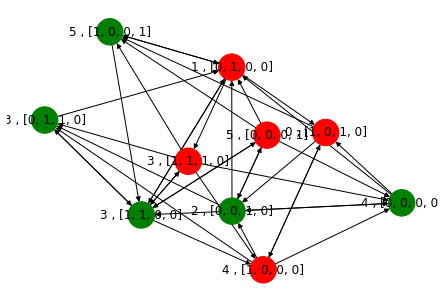

In [3]:
graphgame_viz(rgame)

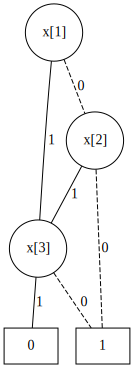

In [4]:
data = run_graphviz((phi_0 | phi_1).to_dot())
SVG(data)

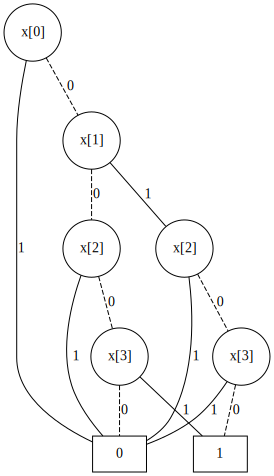

In [5]:
data = run_graphviz(gamma[0].to_dot())
SVG(data)

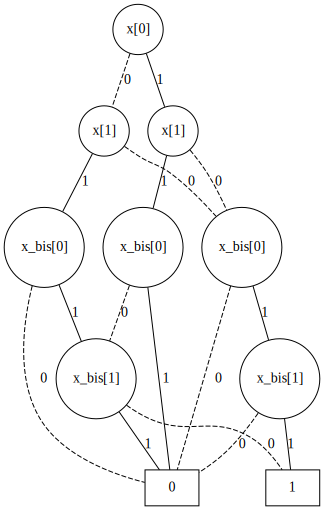

In [8]:
data = run_graphviz(tau.to_dot())
SVG(data)

## Initialisation du jeu (représentation alternative)

In [24]:
rgame = game.generator_sr.random_game_sr(5,2,1,3)

phi_0 = rgame.phi_0
phi_1 = rgame.phi_1
tau = rgame.tau

g_vars = rgame.g_vars
bis_vars = rgame.bis_vars
mapping_bis = rgame.mapping_bis

## Zielonka

In [12]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_ziel, win_1_ziel) = zielonka.zielonka(g_copy)
  
print("L'execution a pris " + str(chrono.interval) + " secondes")

L'execution a pris 0.055973411988816224 secondes


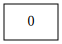

In [7]:
data = run_graphviz(win_0_ziel.to_dot())
SVG(data)

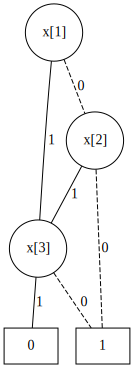

In [8]:
data = run_graphviz(win_1_ziel.to_dot())
SVG(data)

## Zielonka with partial solver

### Buchi solver

In [13]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_buchi, win_1_buchi) = zielonka.ziel_with_psolver(g_copy,buchi_solver.buchi_solver)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 0.08859999099513516 secondes


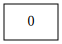

In [10]:
data = run_graphviz(win_0_buchi.to_dot())
SVG(data)

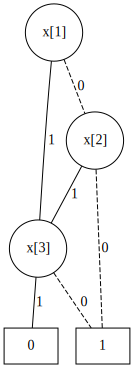

In [11]:
data = run_graphviz(win_1_buchi.to_dot())
SVG(data)

### PsolB

In [14]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_psolB, win_1_psolB) = zielonka.ziel_with_psolver(g_copy,psolB.psolB)
   
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 0.06876606699370313 secondes


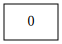

In [14]:
data = run_graphviz(win_0_psolB.to_dot())
SVG(data)

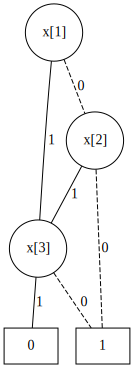

In [15]:
data = run_graphviz(win_1_psolB.to_dot())
SVG(data)

### good_ep_solver

In [15]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_good_ep_solver, win_1_good_ep_solver) = zielonka.ziel_with_psolver(g_copy,good_ep_solver.good_ep_solver)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 0.5525674700038508 secondes


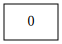

In [18]:
data = run_graphviz(win_0_good_ep_solver.to_dot())
SVG(data)

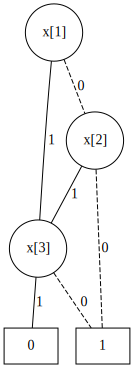

In [19]:
data = run_graphviz(win_1_good_ep_solver.to_dot())
SVG(data)

### lay_solver

In [16]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_lay_solver, win_1_lay_solver) = zielonka.ziel_with_psolver(g_copy,lay_solver.lay_solver)
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 0.08818264899309725 secondes


## Check winning regions

In [17]:
print(win_0_ziel is win_0_buchi)
print(win_0_ziel is win_0_psolB)
print(win_0_ziel is win_0_good_ep_solver)
print(win_0_ziel is win_0_lay_solver)
print(win_1_ziel is win_1_buchi)
print(win_1_ziel is win_1_psolB)
print(win_1_ziel is win_1_good_ep_solver)
print(win_1_ziel is win_1_lay_solver)

True
True
True
True
True
True
True
True


# Generalized parity games

In [2]:
from pyeda.inter import *
import copy
import math
from IPython.display import SVG
from visualize_dot import run_graphviz

from game.generator import random_game
from game.generator_sr import random_game_sr
from game.visualizer import graphgame_viz
from game import timer

from psolvers import psolB,good_ep_solver,lay_solver,buchi_solver

from gen.generator_gen import random_game_gen
from gen.visualizer_gen import graphgame_viz_gen
from gen.ext_visualizer_gen import graphgame_viz_gen_ext
from gen.classical import classical_gen, classical_with_psolver
from psolvers_gen import buchi_solver_gen, good_ep_solver_gen, lay_solver_gen

import buchi
import zielonka

## Init game

In [3]:
rgame = random_game_gen(4,[2,2],1,2)
phi_0 = rgame.phi_0
phi_1 = rgame.phi_1
tau = rgame.tau
gamma = rgame.gamma

g_vars = rgame.g_vars
bis_vars = rgame.bis_vars
mapping_bis = rgame.mapping_bis

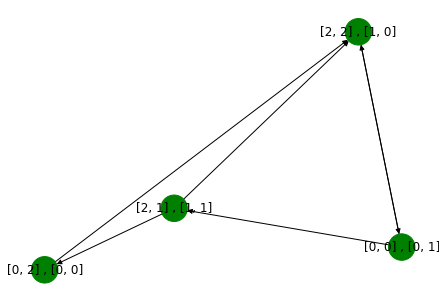

In [3]:
graphgame_viz_gen(rgame)

## Classical

In [4]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_class,win_1_class = classical_gen(g_copy)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

L'execution a pris 0.019016869002371095 secondes


## Buchi_solver

In [5]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_psolB,win_1_psolB = classical_with_psolver(g_copy, buchi_solver_gen.buchi_solver_gen)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

True
False
L'execution a pris 0.01708792700082995 secondes


In [10]:
print(win_0_class is win_0_psolB)
print(win_1_class is win_1_psolB)

True
True


## good_ep_solver

In [6]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_good_ep_solver,win_1_good_ep_solver = classical_with_psolver(g_copy, good_ep_solver_gen.good_ep_solver_gen)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

True
False
L'execution a pris 0.07657699300034437 secondes


In [9]:
print(win_0_class is win_0_good_ep_solver)
print(win_1_class is win_1_good_ep_solver)

True
True


## lay_solver

In [7]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_lay_solver,win_1_lay_solver = classical_with_psolver(g_copy, lay_solver_gen.lay_solver_gen)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

True
False
L'execution a pris 0.02889330399921164 secondes


In [8]:
print(win_0_class is win_0_lay_solver)
print(win_1_class is win_1_lay_solver)

True
True
